## K-Nearest Neighbors

KNN is a classification technique that classifies an instance based on nearby instances. If K=10 and out of the 10 nearest instances 7 are blue and 3 are yellow then the new instance will become blue. A parameter that can be manipulated is what distance metric to use however we will use the euclidian distance below:

In [1]:
#stability
import numpy as np
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [35]:
from sklearn import datasets

# import some data to play with
iris = datasets.load_iris()
f_0 = iris.data[:,0]  # we take feature 0 and 4
f_1 = iris.data[:,3]
X = np.vstack((f_0, f_1))

X = X.T
y = iris.target

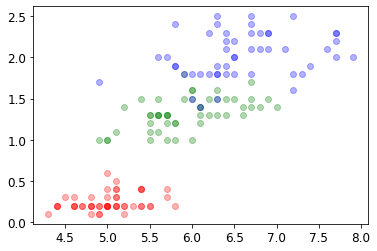

In [36]:
plt.scatter(X[:50,0],X[:50,1],color="r",alpha=0.3)
plt.scatter(X[50:100,0],X[50:100,1],color="g",alpha=0.3)
plt.scatter(X[100:150,0],X[100:150,1],color="b",alpha=0.3)
plt.show()

So we have our data now lets create a function to predict new points:

In [93]:
def predict(X_in, k):
    distances = np.hypot(*(X - X_in).T) #euclidian distance
    indices = np.argpartition(distances,k)[:k] #get indexes of 10 smallest distances
    classes = np.take(y, indices) #get the class they belong to
    return np.bincount(classes).argmax()

In [94]:
predict(np.array([4.9,0.2]),10)

0

Great! Now let's plot the decision boundary:

In [95]:
#here we generate the data
x1_new = np.linspace(4,8,200) 
x2_new = np.linspace(0,3,200)

x1_new_mesh,x2_new_mesh = np.meshgrid(x1_new,x2_new)

x1_flat = x1_new_mesh.flatten()
x2_flat = x2_new_mesh.flatten()

X_new = np.vstack((x1_flat, x2_flat)).T

In [96]:
y_pred = []
for row in X_new:
    y_pred.append(predict(row,10))

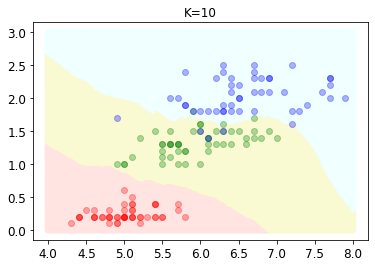

In [111]:
colors = ['mistyrose' if x==0 else 'lightgoldenrodyellow' if x==1 else 'azure' for x in y_pred]

plt.scatter(x1_flat,x2_flat,c=colors)

plt.scatter(X[:50,0],X[:50,1],color="r",alpha=0.3)
plt.scatter(X[50:100,0],X[50:100,1],color="g",alpha=0.3)
plt.scatter(X[100:150,0],X[100:150,1],color="b",alpha=0.3)

plt.title('K=10')
plt.show()

In [117]:
y_pred = []
for row in X_new:
    y_pred.append(predict(row,2))

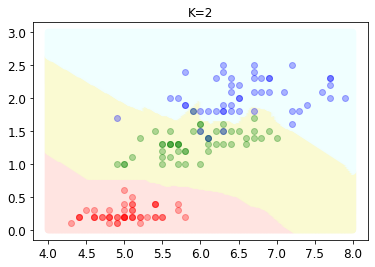

In [118]:
colors = ['mistyrose' if x==0 else 'lightgoldenrodyellow' if x==1 else 'azure' for x in y_pred]

plt.scatter(x1_flat,x2_flat,c=colors)

plt.scatter(X[:50,0],X[:50,1],color="r",alpha=0.3)
plt.scatter(X[50:100,0],X[50:100,1],color="g",alpha=0.3)
plt.scatter(X[100:150,0],X[100:150,1],color="b",alpha=0.3)

plt.title('K=2')
plt.show()

The only thing to be weary is about is that lower K values tend to overfit wheras higher K values underfit.